# House Price Prediction

In [1]:
import re

# option
pd.set_option('max_rows', 50, 'max_columns', 80)
%matplotlib inline

### Dataset
- ID : 집을 구분하는 번호
- date : 집을 구매한 날짜
- price : 집의 가격(Target variable)
- bedrooms : 침실의 수
- bathrooms : 침실 개수 당 화장실의 수(화장실의 수 / 침실의 수 )
- sqft_living : 주거 공간의 평방 피트(면적)
- sqft_lot : 부지의 평방 피트(면적)
- floors : 집의 층 수
- waterfront : 집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰)
- view : 집이 얼마나 좋아 보이는지의 정도
- condition : 집의 전반적인 상태
- grade : King County grading 시스템 기준으로 매긴 집의 등급
- sqft_above : 지하실을 제외한 평방 피트(면적)
- sqft_basement : 지하실의 평방 피트(면적)
- yr_built : 지어진 년도
- yr_renovated : 집을 재건축한 년도
- zipcode : 우편번호
- lat : 위도
- long : 경도
- sqft_living15 : 2015년 기준 주거 공간의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)
- sqft_lot15 : 2015년 기준 부지의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)

In [2]:
train_set = pd.read_csv('./train.csv')
test_set = pd.read_csv('./test.csv')

In [3]:
print("train set 데이터량", train_set.shape)
print("test set 데이터량", test_set.shape)

train set 데이터량 (15035, 21)
test set 데이터량 (6468, 20)


## 1. EDA

In [4]:
train_set

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
5,5,20150403T000000,662500.0,3,2.50,3560,9796,1.0,0,0,3,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925
6,6,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
7,7,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
8,8,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208
9,9,20150312T000000,530000.0,5,2.00,1810,4850,1.5,0,0,3,7,1810,0,1900,0,98107,47.6700,-122.394,1360,4850


### 1-1. Null Data 확인

In [5]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
id               15035 non-null int64
date             15035 non-null object
price            15035 non-null float64
bedrooms         15035 non-null int64
bathrooms        15035 non-null float64
sqft_living      15035 non-null int64
sqft_lot         15035 non-null int64
floors           15035 non-null float64
waterfront       15035 non-null int64
view             15035 non-null int64
condition        15035 non-null int64
grade            15035 non-null int64
sqft_above       15035 non-null int64
sqft_basement    15035 non-null int64
yr_built         15035 non-null int64
yr_renovated     15035 non-null int64
zipcode          15035 non-null int64
lat              15035 non-null float64
long             15035 non-null float64
sqft_living15    15035 non-null int64
sqft_lot15       15035 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 2.4+ MB


### Target 분포

- target value 의 분포가 정규분포와는 거리가 멉니다.
- skewness 가 0보다 큼을 분포 모양이 왼쪽으로 치우쳐져 있는 형태를 통해서도 확인할 수 있으며, 수치들을 통해서도 확인할 수 있습니다.
- kurtosis 역시 매우 뾰족한 분포 모양을 통해서도 알 수 있고, 그 수치가 나타남을 확인 할 수 있습니다.

skewness:  4.290252396939529
kurtosis: 40.15491919350329


/Users/emjayahn/.pyenv/versions/3.7.0/envs/dss/lib/python3.7/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['AppleMyungjo'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/emjayahn/.pyenv/versions/3.7.0/envs/dss/lib/python3.7/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['AppleMyungjo'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


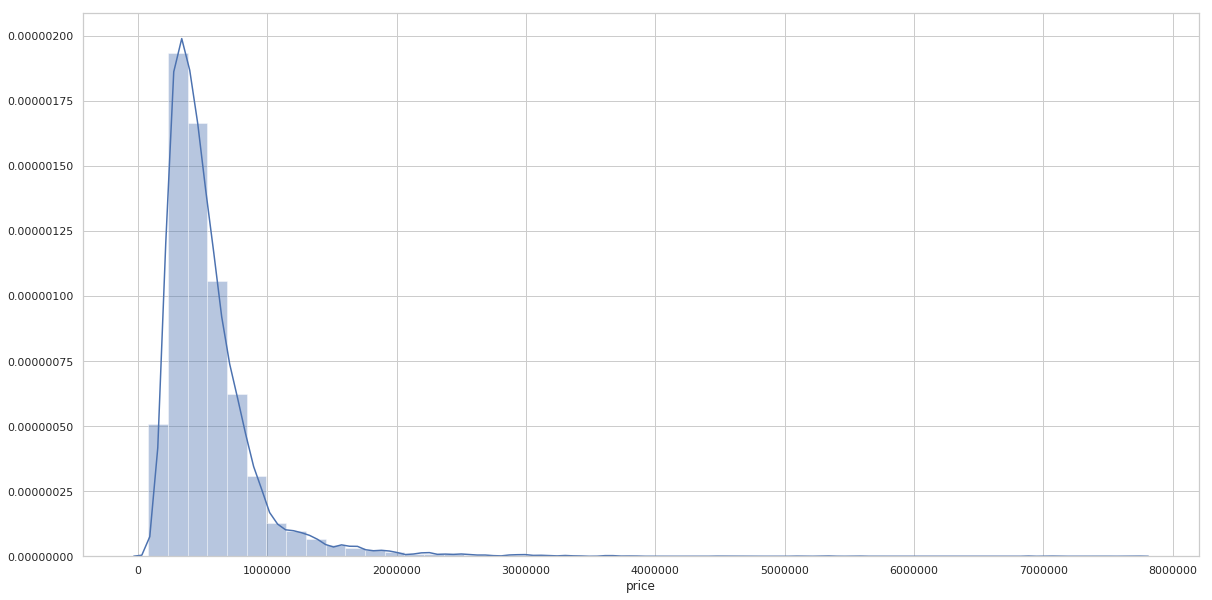

In [6]:
print("skewness: ", train_set['price'].skew())
print("kurtosis:", train_set['price'].kurt())

plt.figure(figsize=(20, 10))
sns.distplot(train_set['price'])

- 이런 현상을 좀 완화해 주기 위해, **log** 를 씌워 target value 를 잡아보겠습니다.

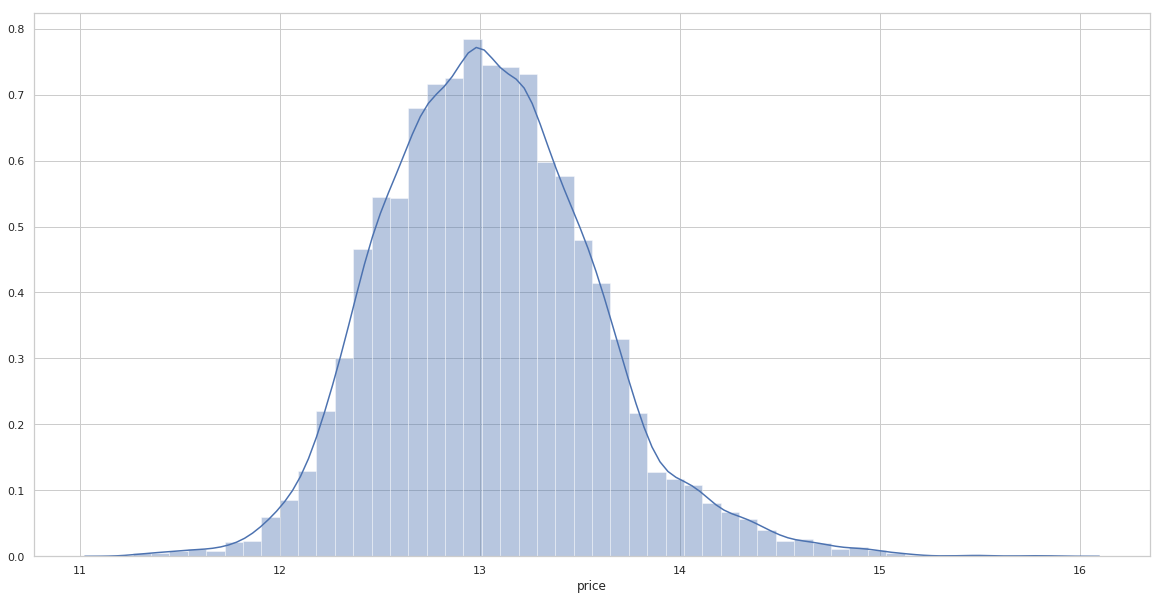

In [7]:
plt.figure(figsize=(20, 10))
sns.distplot(np.log(train_set['price']))

In [8]:
train_set['price'] = np.log(train_set['price'])

### Correlation 확인

In [9]:
train_set.corr()['price'].sort_values(ascending=False)

price            1.000000
grade            0.707412
sqft_living      0.697907
sqft_living15    0.621800
sqft_above       0.607197
bathrooms        0.552000
lat              0.444417
bedrooms         0.359946
view             0.347505
floors           0.317810
sqft_basement    0.314378
waterfront       0.172580
yr_renovated     0.127533
sqft_lot         0.108946
sqft_lot15       0.096976
yr_built         0.076294
long             0.054362
condition        0.042947
id               0.035940
zipcode         -0.039195
Name: price, dtype: float64

## FEATURE ANALYSIS

### `grade`
- King County grading 시스템 기준으로 매긴 집의 등급
- train_set 과 test_set 의 grade feature 의 unique 값을 찍어보면, 다음과 같습니다.
    - train_set 은 1등급~13등급 (2등급 제외), test_set에서는 1, 2 등급 제외


In [10]:
sorted(train_set['grade'].unique())

[1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [11]:
sorted(test_set['grade'].unique())


[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

- `grade` column 을 범주형 데이터로 볼것인가, 실수형 데이터로 볼것인가 고민입니다.
    - 실수형 데이터로 보려고 합니다. 범주형 데이터로 보기 위해서는 각 카테고리마다 그 데이터 갯수가 train 되기에 충분한 양의 데이터가 필요한데 그렇지 못하기 떄문입니다.

In [12]:
for i in range(1, 14):
    print("train_set 에서 grade {}의 데이터 갯수:".format(i), len(train_set[train_set['grade']==i]))
print('\n')
for i in range(1, 14):
    print("test_set 에서 grade {}의 데이터 갯수:".format(i), len(test_set[test_set['grade']==i]))

train_set 에서 grade 1의 데이터 갯수: 1
train_set 에서 grade 2의 데이터 갯수: 0
train_set 에서 grade 3의 데이터 갯수: 2
train_set 에서 grade 4의 데이터 갯수: 23
train_set 에서 grade 5의 데이터 갯수: 174
train_set 에서 grade 6의 데이터 갯수: 1406
train_set 에서 grade 7의 데이터 갯수: 6228
train_set 에서 grade 8의 데이터 갯수: 4207
train_set 에서 grade 9의 데이터 갯수: 1855
train_set 에서 grade 10의 데이터 갯수: 781
train_set 에서 grade 11의 데이터 갯수: 288
train_set 에서 grade 12의 데이터 갯수: 61
train_set 에서 grade 13의 데이터 갯수: 9


test_set 에서 grade 1의 데이터 갯수: 0
test_set 에서 grade 2의 데이터 갯수: 0
test_set 에서 grade 3의 데이터 갯수: 1
test_set 에서 grade 4의 데이터 갯수: 6
test_set 에서 grade 5의 데이터 갯수: 62
test_set 에서 grade 6의 데이터 갯수: 611
test_set 에서 grade 7의 데이터 갯수: 2701
test_set 에서 grade 8의 데이터 갯수: 1843
test_set 에서 grade 9의 데이터 갯수: 754
test_set 에서 grade 10의 데이터 갯수: 350
test_set 에서 grade 11의 데이터 갯수: 108
test_set 에서 grade 12의 데이터 갯수: 28
test_set 에서 grade 13의 데이터 갯수: 4


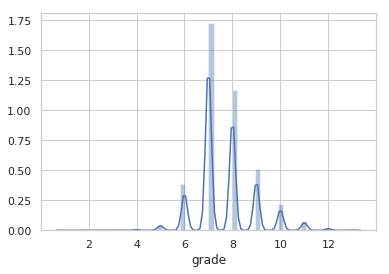

In [13]:
sns.distplot(train_set['grade'])

- `price`와 `grade`는 pearson correlation 에 의해 양의 상관관계를 가지고 있음을 확인할 수 있습니다. 0.71.
- 아래 그림에서도 확인이 가능합니다.

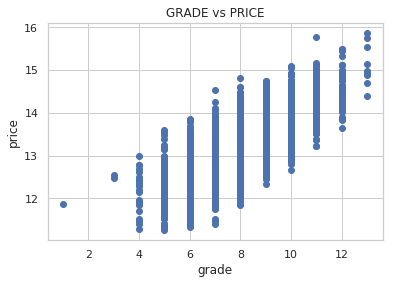

In [14]:
plt.scatter(train_set['grade'], train_set['price'])
plt.title("GRADE vs PRICE")
plt.xlabel('grade')
plt.ylabel('price')
plt.show()

### `sqft_living` & `sqft_living15` & `sqft_above`
- 주거 공간의 평방 피트(면적)과 2015년 기준 주거 공간의 평방 피트를 의미합니다.
- 지하실을 제외한 평방 피트를 의미합니다.
- 세 feature 의 분포 모양은 서로 비슷함을 확인해 볼 수 있습니다.

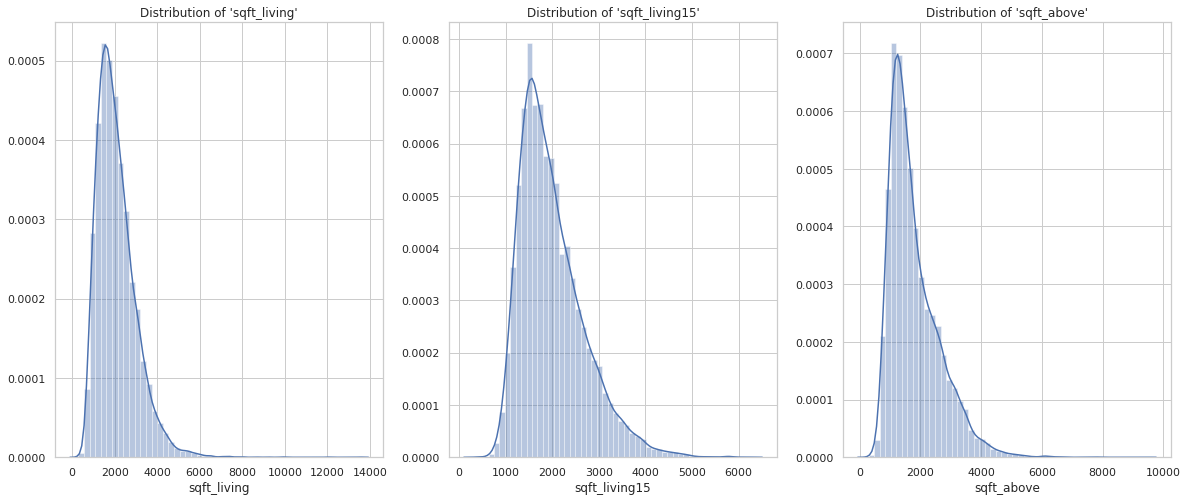

In [15]:
plt.figure(figsize=(20, 8))
plt.subplot(131)
plt.title("Distribution of 'sqft_living'")
sns.distplot(train_set['sqft_living'])

plt.subplot(132)
plt.title("Distribution of 'sqft_living15'")
sns.distplot(train_set['sqft_living15'])

plt.subplot(133)
plt.title("Distribution of 'sqft_above'")
sns.distplot(train_set['sqft_above'])

plt.show()

- 독립 변수간 서로의 pearson correlation 매우 높은 것을 확인 할 수 있습니다.
- 변수간 상호의존적인 경우, overfitting을 방지하기 위해 두 변수를 추후에 다뤄줄 필요가 있겠습니다.

In [55]:
train_set[['sqft_living', 'sqft_living15', 'sqft_above', 'sqft_basement']].corr()

,sqft_living,sqft_living15,sqft_above,sqft_basement
sqft_living,1.000000,0.760271,0.878736,0.434017
sqft_living15,0.760271,1.000000,0.737795,0.198380
sqft_above,0.878736,0.737795,1.000000,-0.048623
sqft_basement,0.434017,0.198380,-0.048623,1.000000


### `bathrooms`
- 침실 갯수당 화장실의 수

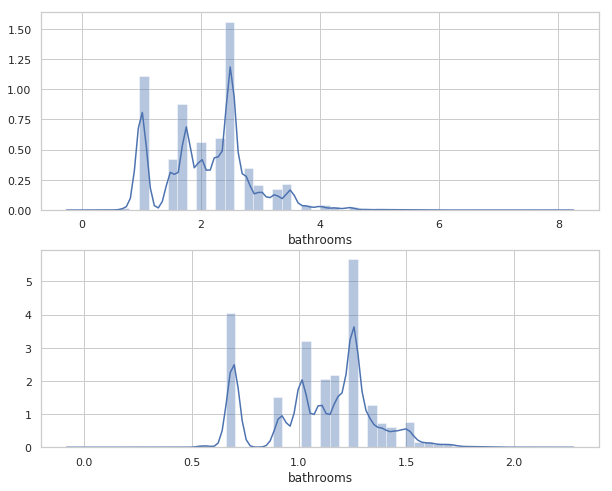

In [17]:
plt.figure(figsize=(10, 8))
plt.subplot(211)
sns.distplot(train_set['bathrooms'])
plt.subplot(212)
sns.distplot(np.log1p(train_set['bathrooms']))

### `lat` & `long`
- 위도 & 경도
- correlation 을 비교 했을 때, 위도의 경우 0.4, 경도의 경우 0.05 를 갖는 것을 볼 수 있다.
- 같은 경도에 위치했을 때, 위도 값이 클 수록 집 값이 높다는 의미로 볼수 있겠다.

In [152]:
print(max(train_set['long']), max(train_set['lat']))

-121.315 47.7776


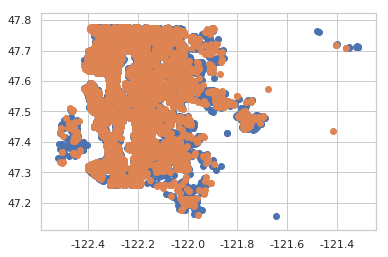

In [153]:
plt.scatter(train_set['long'], train_set['lat'])
plt.scatter(test_set['long'], test_set['lat'])
plt.show()

In [174]:
import geopandas as gpd
from shapely.geometry import Point
countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

In [ ]:
geometry = [Point(xy) for xy in zip(train_set['long'], train_set['lat'])]
geo_df = gpd.GeoDataFrame(train_set, geometry = geometry)
usa = gpd.read_file('./maps/states_21basic/states.shp')

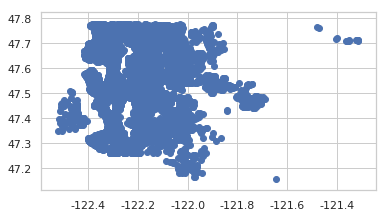

In [156]:
geo_df.plot()

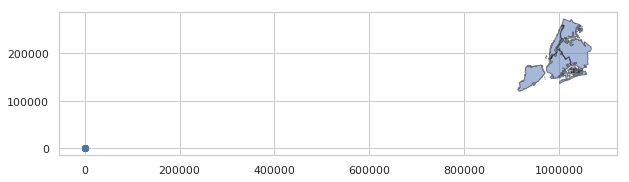

In [166]:
df = geopandas.read_file(geopandas.datasets.get_path('nybb'))
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
geo_df.plot(ax = ax)

### `view`
- 집이 얼마나 좋아 보이는지의 정도

In [19]:
print(train_set['view'].unique())
print(test_set['view'].unique())

[0 3 4 2 1]
[0 2 4 1 3]


In [20]:
for i in range(5):
    print("view 값이 {}인 data수:".format(i), len(train_set[train_set['view']==i]))
print('\n')
for i in range(5):
    print("view 값이 {}인 data수:".format(i), len(test_set[test_set['view']==i]))        

view 값이 0인 data수: 13548
view 값이 1인 data수: 241
view 값이 2인 data수: 665
view 값이 3인 data수: 373
view 값이 4인 data수: 208


view 값이 0인 data수: 5837
view 값이 1인 data수: 91
view 값이 2인 data수: 297
view 값이 3인 data수: 134
view 값이 4인 data수: 109


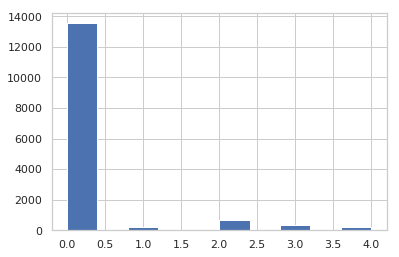

In [21]:
train_set['view'].hist()

/Users/emjayahn/.pyenv/versions/3.7.0/envs/dss/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/emjayahn/.pyenv/versions/3.7.0/envs/dss/lib/python3.7/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['AppleMyungjo'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


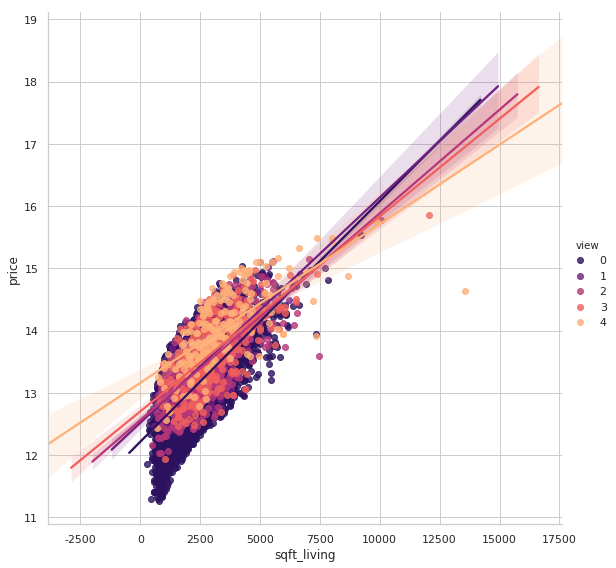

In [22]:
sns.lmplot(x="sqft_living", y="price", hue="view", data=train_set, palette = 'magma', size = 8)

### `floors`
- 집의 층수

In [23]:
print("train_set", sorted(train_set['floors'].unique()))
print("test_set", sorted(test_set['floors'].unique()))

train_set [1.0, 1.5, 2.0, 2.5, 3.0, 3.5]
test_set [1.0, 1.5, 2.0, 2.5, 3.0, 3.5]


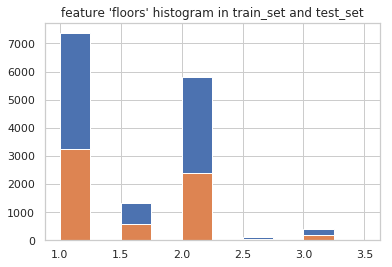

In [24]:
plt.title("feature 'floors' histogram in train_set and test_set")
train_set['floors'].hist()
test_set['floors'].hist()
plt.show()

In [25]:
for i in sorted(train_set['floors'].unique()):
    print("floors 값이 {}인 data수:".format(i), len(train_set[train_set['floors']==i]))
print('\n')
for i in sorted(test_set['floors'].unique()):
    print("floors 값이 {}인 data수:".format(i), len(test_set[test_set['floors']==i]))        

floors 값이 1.0인 data수: 7361
floors 값이 1.5인 data수: 1330
floors 값이 2.0인 data수: 5810
floors 값이 2.5인 data수: 113
floors 값이 3.0인 data수: 417
floors 값이 3.5인 data수: 4


floors 값이 1.0인 data수: 3251
floors 값이 1.5인 data수: 565
floors 값이 2.0인 data수: 2406
floors 값이 2.5인 data수: 48
floors 값이 3.0인 data수: 194
floors 값이 3.5인 data수: 4


/Users/emjayahn/.pyenv/versions/3.7.0/envs/dss/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


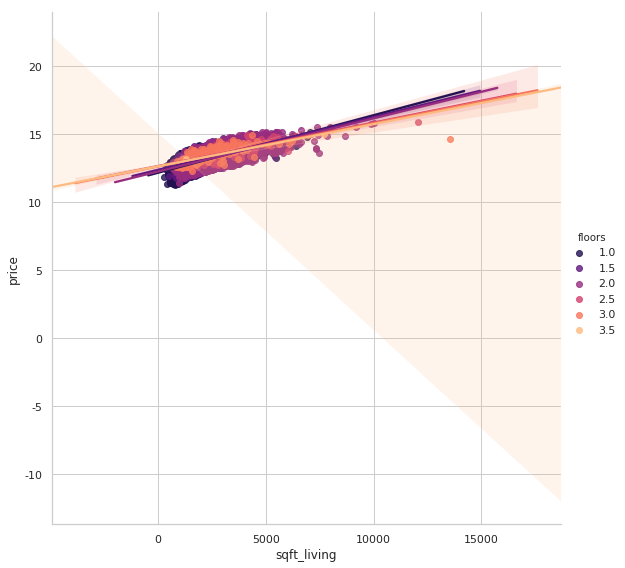

In [26]:
sns.lmplot(x="sqft_living", y="price", hue="floors", data=train_set, palette = 'magma', size = 8)

### `sqft_basement`
- 지하실의 평방피트
- 최소 0 ~ 4130 (피트) 까지 분포되어있는 feature 이다.

In [58]:
train_set['sqft_basement'].describe()

count    15035.000000
mean       289.632059
std        440.663284
min          0.000000
25%          0.000000
50%          0.000000
75%        550.000000
max       4130.000000
Name: sqft_basement, dtype: float64

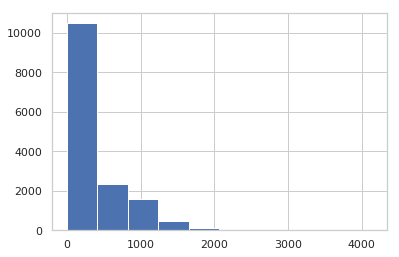

In [57]:
train_set['sqft_basement'].hist()

- `sqft_basement`는 feature 간 correlation 이 큰 것이 없다.

In [59]:
train_set[['sqft_living', 'sqft_living15', 'sqft_above', 'sqft_basement', 'sqft_lot', 'sqft_lot15']].corr()

,sqft_living,sqft_living15,sqft_above,sqft_basement,sqft_lot,sqft_lot15
sqft_living,1.000000,0.760271,0.878736,0.434017,0.176500,0.184176
sqft_living15,0.760271,1.000000,0.737795,0.198380,0.147562,0.183599
sqft_above,0.878736,0.737795,1.000000,-0.048623,0.186242,0.194226
sqft_basement,0.434017,0.198380,-0.048623,1.000000,0.017818,0.018813
sqft_lot,0.176500,0.147562,0.186242,0.017818,1.000000,0.728458
sqft_lot15,0.184176,0.183599,0.194226,0.018813,0.728458,1.000000


### `waterfront`
- 집의 전방에 강이 흐르는지 유무
- 변수형 데이터의 갯수가 14928 : 107 개로 차이가 크다

In [73]:
train_set['waterfront'].value_counts()

0    14928
1      107
Name: waterfront, dtype: int64

- grade vs price 의 기울기가 waterfront 가 다를 때 크게 달라지지 않는다.  bias 의 차이가 나타난다.

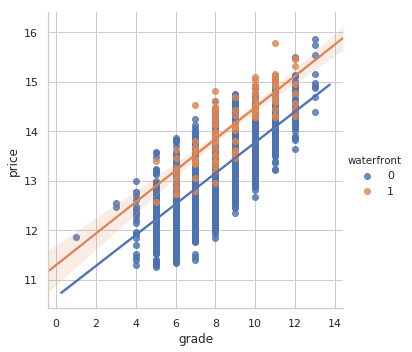

In [76]:
sns.lmplot(x='grade', y='price', hue='waterfront', data=train_set)

- waterfront 값을 category 로 넣어도 될 것 같은 느낌

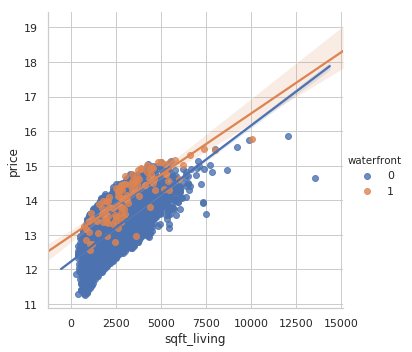

In [77]:
sns.lmplot(x='sqft_living', y='price', hue='waterfront', data=train_set)

### `yr_built` & `yr_renovated`
- 집을 재건축한 년도

In [83]:
train_set['yr_built'].unique()

array([1955, 1933, 1987, 1995, 1963, 1965, 1942, 1927, 1977, 1900, 1979,
       1994, 1916, 1921, 1969, 1947, 1968, 1985, 1941, 1915, 1909, 2003,
       1929, 1981, 1930, 1904, 1996, 1984, 2014, 1922, 1966, 1950, 2008,
       1959, 1954, 1989, 2005, 1973, 1972, 1986, 1956, 2002, 1992, 1964,
       1952, 1925, 1961, 2006, 1988, 2001, 1962, 1939, 1967, 1975, 1910,
       1983, 1991, 1905, 1980, 1971, 2010, 1945, 1924, 1978, 1926, 1923,
       1990, 2000, 1976, 1949, 1999, 1901, 1993, 1948, 1920, 1997, 1957,
       2004, 1960, 1940, 1918, 1974, 1911, 1937, 1982, 1908, 1931, 1998,
       1928, 1943, 1907, 2013, 1953, 2012, 2007, 1912, 2011, 1917, 1958,
       1946, 1951, 1932, 1944, 2009, 1903, 1970, 1938, 1919, 1906, 1936,
       1913, 1902, 1914, 2015, 1935, 1934])

In [78]:
train_set['yr_renovated'].unique()

array([   0, 2002, 1999, 1991, 1978, 2005, 2008, 2003, 1994, 1984, 1954,
       2014, 2011, 1974, 1983, 2013, 1990, 1957, 1977, 1981, 1995, 2000,
       1986, 1992, 2004, 2007, 1987, 2006, 1985, 1971, 1945, 1979, 1997,
       2010, 1969, 1948, 2009, 1970, 2015, 1989, 2001, 1968, 2012, 1963,
       1993, 1962, 1972, 1980, 1998, 1955, 1996, 1950, 1956, 1982, 1988,
       1940, 1946, 1975, 1964, 1958, 1976, 1973, 1967, 1965, 1944])

In [86]:
train_set['yr_built'].value_counts()

2014    405
2006    325
2004    305
2005    302
2003    284
2007    281
1977    272
1978    265
1968    254
2008    247
1967    242
1979    235
1959    225
1990    225
1987    223
2001    221
1989    210
1954    209
1962    202
1947    193
1955    193
1969    192
1950    189
1988    185
1999    182
       ... 
1919     59
1900     59
1923     56
1912     52
1921     51
1911     50
1905     50
1931     49
1937     49
1907     44
1915     43
1913     43
1938     42
1917     42
1914     40
1904     36
1903     30
1936     29
2015     28
1932     24
1901     21
1933     20
1902     20
1935     19
1934     11
Name: yr_built, Length: 116, dtype: int64

- 앞서, null 값이 없다고 생각했었지만, yr_renovated 의 경우 대부분의 값들이 0값임을 알수 있다. 
- 이는 애초에 재건축이 되지 않았거나, 혹은 재건축이 되었더라도, 기록을 못했기때문에 일어난 일이라고 생각하는 것이 일감이지만, 좀더 살펴볼 필요가 있다.

In [82]:
train_set['yr_renovated'].value_counts()

0       14404
2014       71
2013       28
2003       25
2007       25
2000       25
2005       24
1990       18
2004       17
2006       17
2001       15
2009       15
1991       15
1989       15
2002       15
1998       14
1984       14
1995       14
1983       13
1994       13
1999       13
1985       13
2010       12
2008       11
1987       11
        ...  
1981        4
1975        4
1980        4
1970        4
1964        4
1955        3
1972        3
1965        3
1956        3
1969        3
1967        2
1974        2
1957        2
1958        2
1962        2
1971        2
1973        2
1948        1
1950        1
1945        1
1946        1
1954        1
1976        1
1944        1
1940        1
Name: yr_renovated, Length: 65, dtype: int64

- 경험칙상, 재건축을 하게 되면 지어진 날짜보다는 재건축된 날짜가 아파트의 연식을 계산하는데 더 주요한 변수가 된다.
    - 따라서, yr_renovated 와 yr_built 를 합치는 새로운 column 을 생각해 볼 수 있다.
    - 재건축을 하지 않아, yr_renovated 의 값이 0 인 경우, yr_built 를 가져오고,
    - 재건축을 한 경우에는 yr_renovated 의 값을 가져오는 column 을 생성해보는 것이다.

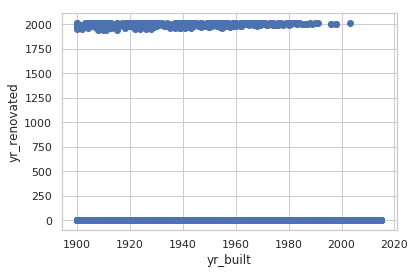

In [88]:
plt.xlabel("yr_built")
plt.ylabel("yr_renovated")
plt.scatter(train_set['yr_built'], train_set['yr_renovated'])

- 가장 최근에 지어진 주택 중, 재건축이 된 주택(위 그래프 상에서 오른쪽 상단에 있는 주택)을 살펴보겠습니다.
    - 2003년에 지어진 건물이 2009년에 재건축 된 것을 볼 수 있습니다.

In [89]:
train_set[(train_set['yr_built']>=2000 ) & (train_set['yr_renovated']!=0)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
12638,12638,20141022,13.623139,4,3.5,3620,6499,2.5,0,0,3,9,3620,0,2003,2009,98177,47.7326,-122.36,2330,7200,2014,10,22


In [103]:
train_set['yr_combine'] = train_set.apply(lambda df: max(df['yr_built'], df['yr_renovated']), axis=1)

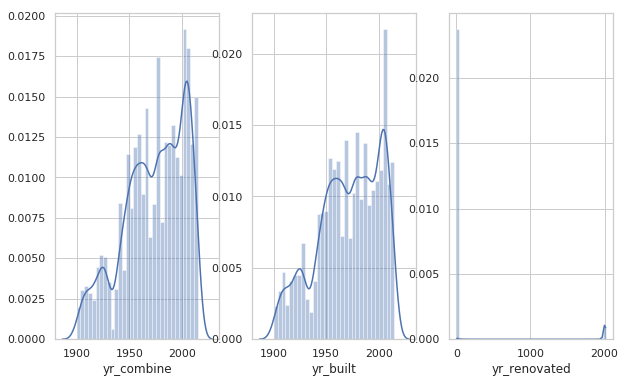

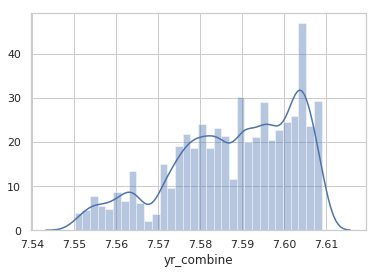

In [120]:
from sklearn.preprocessing import scale
plt.figure(figsize=(10, 6))

plt.subplot(131)
sns.distplot(train_set['yr_combine'])

plt.subplot(132)
sns.distplot(train_set['yr_built'])

plt.subplot(133)
sns.distplot(train_set['yr_renovated'])
plt.show()

sns.distplot(np.log1p(train_set['yr_combine']))
plt.show()

In [112]:
train_set[['price', 'yr_combine']].corr()

,price,yr_combine
price,1.000000,0.128711
yr_combine,0.128711,1.000000


### `sqft_lot` & `sqft_lot15`
- 부지의 평방 피트(면적)

In [130]:
print(train_set['sqft_lot'].describe())
print('\n')
print(train_set['sqft_lot15'].describe())

count    1.503500e+04
mean     1.529697e+04
std      4.261282e+04
min      5.200000e+02
25%      5.027500e+03
50%      7.620000e+03
75%      1.069550e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64


count     15035.000000
mean      12823.884935
std       27736.259787
min         651.000000
25%        5100.000000
50%        7610.000000
75%       10076.000000
max      871200.000000
Name: sqft_lot15, dtype: float64


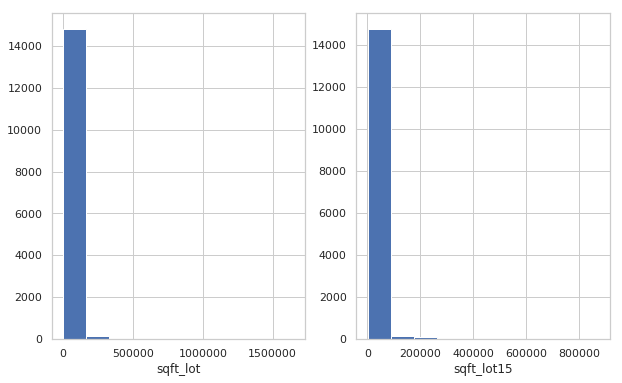

In [135]:
plt.figure(figsize=(10, 6))

plt.subplot(121)
plt.xlabel("sqft_lot")
train_set['sqft_lot'].hist()

plt.subplot(122)
plt.xlabel("sqft_lot15")
train_set['sqft_lot15'].hist()
plt.show()

In [137]:
train_set[['sqft_lot', 'sqft_lot15', 'price']].corr()

,sqft_lot,sqft_lot15,price
sqft_lot,1.000000,0.728458,0.108946
sqft_lot15,0.728458,1.000000,0.096976
price,0.108946,0.096976,1.000000


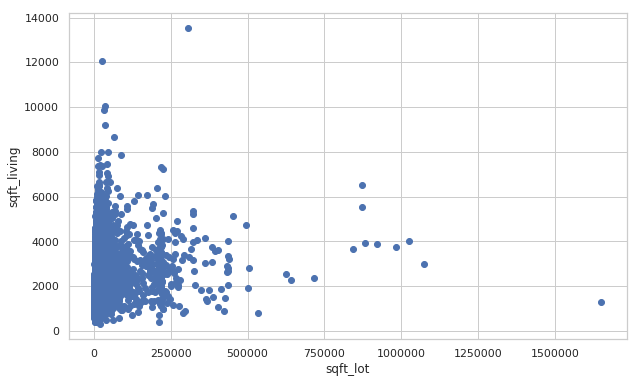

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(train_set['sqft_lot'], train_set['sqft_living'])
plt.xlabel("sqft_lot")
plt.ylabel("sqft_living")
plt.show()

### `Date`

- `date` feature 에는 null 값이 없는 것을 확인 해 볼 수 있습니다.

In [27]:
train_set['date'].isnull().any()

False

- `Date` Column 이 모두 **날짜(숫자 8자리) + T000000** pattern 으로 되어있는지 확인
    - 확인결과, 모두 숫자, T000000 형태가 붙어있는 것을 확인 할 수 있습니다. (True)

In [28]:
def regex(data):
    pattern = re.compile('^[0-9]{8}T000000$')
    match = pattern.match(data)
    if match:
        return True
    else:
        return False
    
pattern = re.compile('[0-9]{8}T000000$')
pattern.match(train_set['date'].iloc[0])

<re.Match object; span=(0, 15), match='20141013T000000'>

In [29]:
train_set['date_pattern_check'] = train_set['date'].apply(lambda data: regex(data))

In [30]:
train_set['date_pattern_check'].unique()

array([ True])

In [31]:
# 확인 후, 필요 없는 column 제거
train_set = train_set.drop('date_pattern_check', axis=1)

- `date` column의 T000000은 데이터를 구분하는 큰 의미가 없어 보이므로, 제거해줍니다.

In [32]:
train_set['date'] = train_set['date'].apply(lambda data: data[:8])
train_set.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013,12.309982,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225,12.100712,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218,13.142166,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627,12.458775,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115,12.583995,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


- `date` column 이 `yyyymmdd` 형식을 가지고 있으므로, `year`, `month`, `day` 형식의 column 으로 생성해줍니다.

In [33]:
train_set['year'] = train_set['date'].apply(lambda data: int(data[:4]))
train_set['month'] = train_set['date'].apply(lambda date: int(date[4:6]))
train_set['day'] = train_set['date'].apply(lambda date: int(date[6:]))
train_set.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,0,20141013,12.309982,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,1,20150225,12.100712,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
2,2,20150218,13.142166,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18
3,3,20140627,12.458775,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,2014,6,27
4,4,20150115,12.583995,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,2015,1,15


- `year` 와 `price` 간의 Boxplot

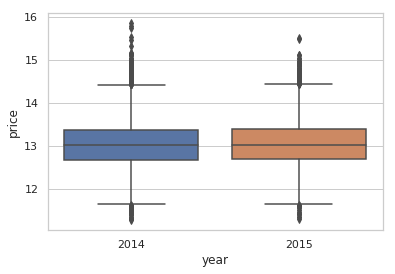

In [34]:
ax = sns.boxplot(x="year", y="price", data=train_set)

- `month` 와 `price`간의 Boxplot

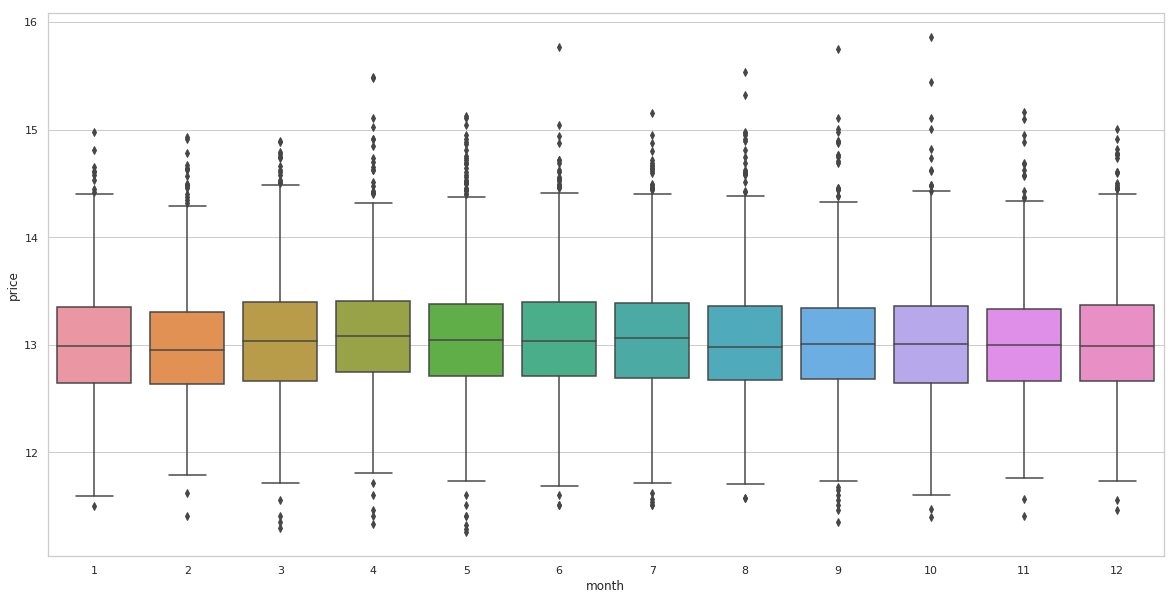

In [35]:
plt.figure(figsize=(20, 10))
ax = sns.boxplot(x="month", y="price", data=train_set)

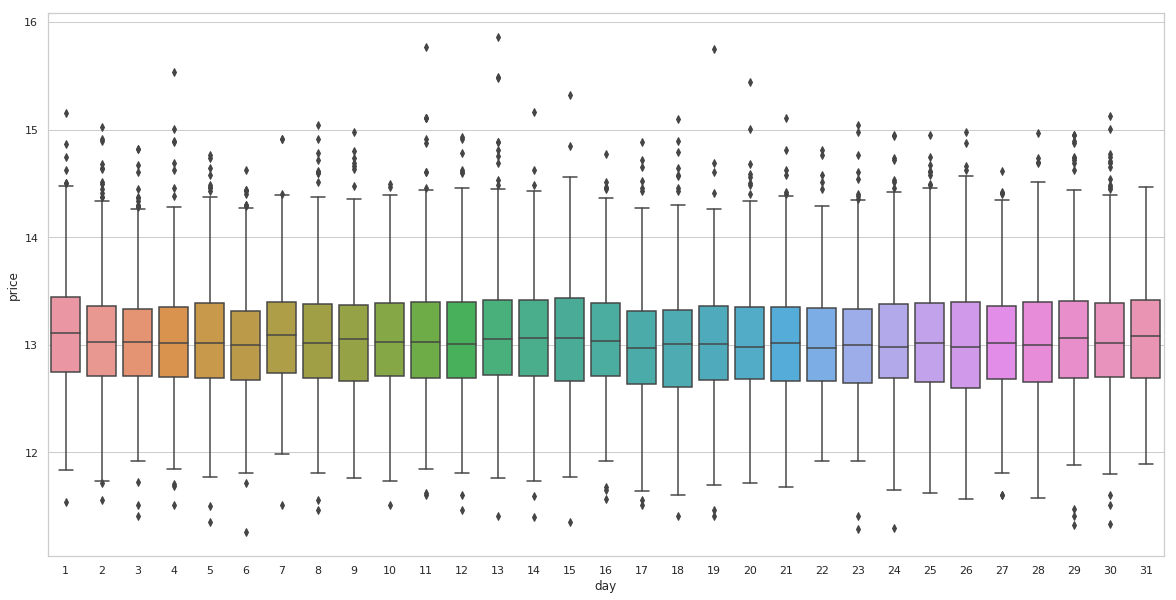

In [36]:
plt.figure(figsize=(20, 10))
ax = sns.boxplot(x="day", y="price", data=train_set)

In [37]:
train_set.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,0,20141013,12.309982,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,1,20150225,12.100712,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
2,2,20150218,13.142166,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18
3,3,20140627,12.458775,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,2014,6,27
4,4,20150115,12.583995,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,2015,1,15


### `bedrooms`
- histogram 분포를 보면 대부분의 집의 침실이 3~4개에 집중 되어 있는 것을 볼 수 있다.
- 평균과 분산을 통해서도 그것을 확인 할 수 있으며, 75% 분위선까지도 4개의 침실인 것을 볼 수 있다.

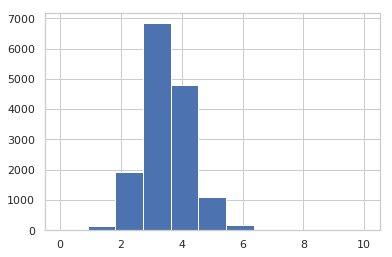

In [38]:
train_set['bedrooms'].hist(bins=len(train_set['bedrooms'].unique()))

In [39]:
train_set['bedrooms'].describe()

count    15035.000000
mean         3.369139
std          0.902721
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: bedrooms, dtype: float64

### `sqft_living` 
- 한쪽으로 치우쳐져 있음을 확인 할 수 있다.

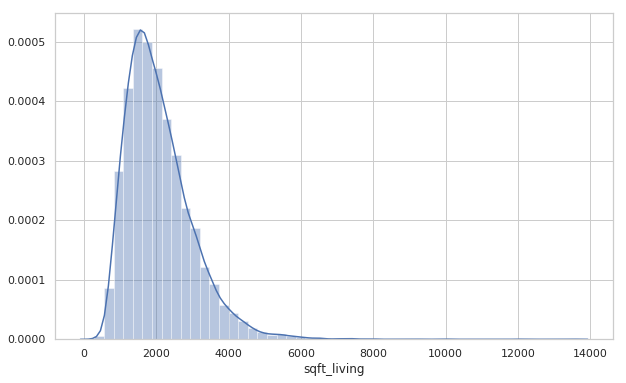

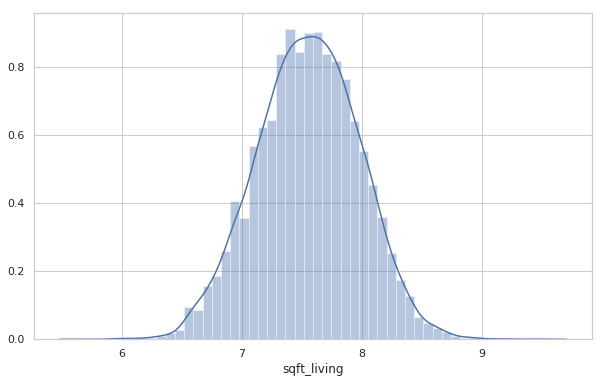

In [40]:
plt.figure(figsize=(10, 6))
sns.distplot(train_set['sqft_living'])
plt.show()

plt.figure(figsize=(10, 6))
sns.distplot(np.log1p(train_set['sqft_living']))
plt.show()



### BASELINE

In [44]:
train_set.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
id,1.000000,0.035940,0.010520,0.104030,0.041725,-0.034077,0.182848,-0.011775,-0.024360,-0.101618,0.078622,0.073086,-0.050634,0.202477,-0.029810,-0.005761,0.002588,0.014757,0.029248,-0.032269,-0.013244,0.009917,0.002289
price,0.035940,1.000000,0.359946,0.552000,0.697907,0.108946,0.317810,0.172580,0.347505,0.042947,0.707412,0.607197,0.314378,0.076294,0.127533,-0.039195,0.444417,0.054362,0.621800,0.096976,0.009913,-0.013975,-0.020578
bedrooms,0.010520,0.359946,1.000000,0.530548,0.596974,0.033475,0.189532,-0.004819,0.085703,0.034885,0.375286,0.494867,0.315183,0.158799,0.022729,-0.162081,-0.011190,0.135802,0.407394,0.027242,-0.002067,-0.007382,-0.012671
bathrooms,0.104030,0.552000,0.530548,1.000000,0.755853,0.089308,0.508649,0.075452,0.187488,-0.125907,0.666278,0.688255,0.282642,0.503964,0.065423,-0.207500,0.018110,0.227669,0.573541,0.088120,-0.022161,0.007759,-0.010256
sqft_living,0.041725,0.697907,0.596974,0.755853,1.000000,0.176500,0.363193,0.108137,0.282821,-0.054213,0.762543,0.878736,0.434017,0.315927,0.064893,-0.200745,0.051609,0.245429,0.760271,0.184176,-0.021638,0.009763,-0.011125
sqft_lot,-0.034077,0.108946,0.033475,0.089308,0.176500,1.000000,0.001535,0.025584,0.080441,-0.002099,0.119906,0.186242,0.017818,0.058686,-0.001451,-0.127709,-0.082234,0.227451,0.147562,0.728458,0.007243,-0.001897,0.003807
floors,0.182848,0.317810,0.189532,0.508649,0.363193,0.001535,1.000000,0.031159,0.034511,-0.261016,0.462598,0.529476,-0.239350,0.490436,0.009752,-0.059107,0.049004,0.126983,0.287125,-0.010287,-0.020852,0.015441,-0.008965
waterfront,-0.011775,0.172580,-0.004819,0.075452,0.108137,0.025584,0.031159,1.000000,0.389669,0.011613,0.088061,0.081968,0.071576,-0.026523,0.104168,0.028632,-0.014772,-0.037922,0.091810,0.028255,-0.002041,0.005828,0.014694
view,-0.024360,0.347505,0.085703,0.187488,0.282821,0.080441,0.034511,0.389669,1.000000,0.045255,0.247924,0.172693,0.265880,-0.061670,0.107605,0.089247,0.005285,-0.073151,0.278267,0.076501,0.014233,-0.014440,0.013287
condition,-0.101618,0.042947,0.034885,-0.125907,-0.054213,-0.002099,-0.261016,0.011613,0.045255,1.000000,-0.143599,-0.152856,0.175064,-0.366590,-0.062342,0.001106,-0.015974,-0.110742,-0.091407,-0.003873,-0.045968,0.020182,-0.003907


In [45]:
model = sm.OLS.from_formula("price ~ grade + sqft_living + bedrooms", data=train_set)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     6410.
Date:                Fri, 15 Mar 2019   Prob (F-statistic):               0.00
Time:                        11:29:17   Log-Likelihood:                -5522.1
No. Observations:               15035   AIC:                         1.105e+04
Df Residuals:                   15031   BIC:                         1.108e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      11.2270      0.025    446.834      

In [46]:
model = sm.OLS.from_formula("np.log1p(price) ~ grade + sqft_living + sqft_living15 + bedrooms + C(waterfront):grade", data=train_set)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:        np.log1p(price)   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     3891.
Date:                Fri, 15 Mar 2019   Prob (F-statistic):               0.00
Time:                        11:29:17   Log-Likelihood:                 34347.
No. Observations:               15035   AIC:                        -6.868e+04
Df Residuals:                   15029   BIC:                        -6.864e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [47]:
model = sm.OLS.from_formula("price ~ grade + sqft_living + sqft_living15 + sqft_above + bathrooms +\
                            lat + bedrooms + view + floors + sqft_basement + C(waterfront) + yr", data=train_set)
result = model.fit()
print(result.summary())

PatsyError: Error evaluating factor: NameError: name 'yr' is not defined
    price ~ grade + sqft_living + sqft_living15 + sqft_above + bathrooms +                            lat + bedrooms + view + floors + sqft_basement + C(waterfront) + yr
                                                                                                                                                                       ^^

In [ ]:
train_set['waterfront'].head()

In [ ]:
new_df = pd.get_dummies(train_set)

In [ ]:
new_df.head()

In [ ]:
pd.get_dummies(train_set['waterfront'])